In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Tweets.csv")

#first 5 rows
print(df.head())

# Check column names and data types
print(df.info())

# Check unique sentiment labels
print(df['airline_sentiment'].value_counts())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

### Load Spacy for processing the text

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")


### Step 2: Text Preprocessing
clean the tweets by:
- Lowercasing text
- Removing mentions, hashtags, URLs, punctuation, and numbers
- Removing stop words using spaCy
- Applying lemmatization

This helps reduce noise and standardize the text for analysis.


In [3]:
import pandas as pd
import spacy
import re
from tqdm import tqdm

#dataset
df = pd.read_csv("Tweets.csv")


nlp = spacy.load("en_core_web_sm")

#clean text
def preprocess_tweet(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  #  URLs
    text = re.sub(r'\@\w+|\#', '', text)             #  mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)          #  punctuation/numbers
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # Lemmatize & remove stopwords
    return " ".join(tokens)

#preprocessing
tqdm.pandas()
df["clean_text"] = df["text"].progress_apply(preprocess_tweet)

#cleaned text
df[["text", "clean_text"]].head()


100%|████████████████████████████████████████████████████████████████████████████| 14640/14640 [04:53<00:00, 49.90it/s]


,text,clean_text
0,@VirginAmerica What @dhepburn said.,say
1,@VirginAmerica plus you've added commercials t...,plus ve add commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,not today mean need trip
3,@VirginAmerica it's really aggressive to blast...,aggressive blast obnoxious entertainment guest...
4,@VirginAmerica and it's a really big bad thing...,big bad thing


In [4]:
import nltk
nltk.download('punkt')
from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\momih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 3: Feature Extraction
 Extracted numeric features from each tweet:
- Word count
- Character count
- Punctuation count
- Hashtag count
- Mention count
- Sentiment polarity (using TextBlob)


In [5]:
# Word count
df["word_count"] = df["clean_text"].apply(lambda x: len(str(x).split()))

# Character count
df["char_count"] = df["clean_text"].apply(lambda x: len(str(x)))

# Count of hashtags (#)
df["hashtag_count"] = df["text"].apply(lambda x: x.count('#'))

# Count of mentions (@)
df["mention_count"] = df["text"].apply(lambda x: x.count('@'))

# Count of punctuation
import string
df["punctuation_count"] = df["text"].apply(lambda x: len([c for c in x if c in string.punctuation]))

# Sentiment polarity using TextBlob
df["polarity"] = df["clean_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Preview the new features
df[["text", "word_count", "char_count", "hashtag_count", "mention_count", "punctuation_count", "polarity"]].head()


,text,word_count,char_count,hashtag_count,mention_count,punctuation_count,polarity
0,@VirginAmerica What @dhepburn said.,1,3,0,2,3,0.0000
1,@VirginAmerica plus you've added commercials t...,6,39,0,1,6,0.0000
2,@VirginAmerica I didn't today... Must mean I n...,5,24,0,1,6,-0.3125
3,@VirginAmerica it's really aggressive to blast...,9,71,0,1,7,-0.1875
4,@VirginAmerica and it's a really big bad thing...,3,13,0,1,2,-0.3500


### Step 4: TF-IDF Vectorization
Converted the cleaned tweets into numerical vectors using TF-IDF. This captures the importance of words across the dataset, improving model accuracy.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer (unigrams and bigrams, limit to top 1000 features)
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

# Fit and transform the clean_text column
X_tfidf = tfidf.fit_transform(df["clean_text"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Optional: preview TF-IDF features
tfidf_df.head()


,aa,able,absolute,absolutely,accept,acceptable,access,accommodate,account,actual,...,wrong,wtf,yeah,year,year old,yes,yesterday,you,yr,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Select only the useful numeric features from the original df
manual_features = df[["word_count", "char_count", "hashtag_count", "mention_count", "punctuation_count", "polarity"]]

# Concatenate manually extracted features with TF-IDF features
final_features = pd.concat([manual_features.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Target label (sentiment)
target = df["airline_sentiment"]

# Final shape
print("Final feature shape:", final_features.shape)
print("Target label distribution:\n", target.value_counts())


Final feature shape: (14640, 1006)
Target label distribution:
 airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


### Step 5: Visualization
We visualize:
- Sentiment label distribution (positive, neutral, negative)
- Correlation between numeric features



C:\Users\momih\AppData\Local\Temp\ipykernel_5672\1446368911.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette="Set2")


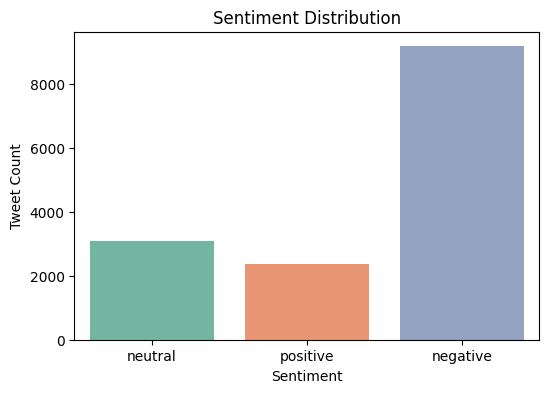

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


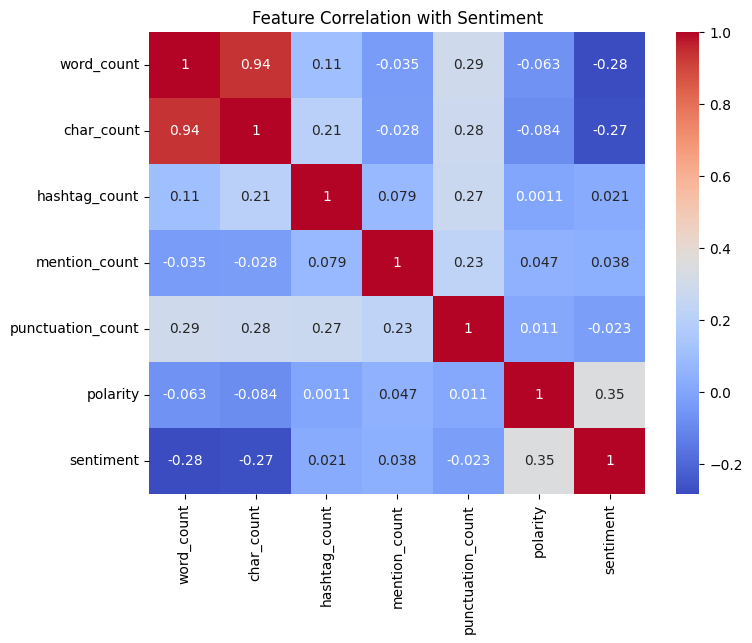

In [9]:
# Compute correlation between manual features and sentiment label (converted to numeric)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sentiment_numeric = le.fit_transform(target)  # negative=0, neutral=1, positive=2

# Add numeric sentiment to manual_features
correlation_df = manual_features.copy()
correlation_df["sentiment"] = sentiment_numeric

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Sentiment")
plt.show()
